In [52]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

In [53]:
# load data into pandas dataframe
data = pd.read_csv('VNDIRECT_STOCK.csv', index_col='Date', parse_dates=True)
data

,Close,Open,High,Low
Date,,,,
2017-12-01,16511.9,"16,477.20","16,615.90","16,338.40"
2017-12-04,16997.5,"16,720.00","17,309.70","16,615.90"
2017-12-05,16303.7,"16,997.50","16,997.50","16,303.70"
2017-12-06,16234.4,"16,234.40","16,373.10","15,748.70"
2017-12-07,15818.1,"16,303.70","16,338.40","15,679.30"
...,...,...,...,...
2023-04-24,14950.0,"15,050.00","15,150.00","14,750.00"
2023-04-25,14600.0,"14,950.00","15,100.00","14,550.00"
2023-04-26,14650.0,"14,600.00","14,750.00","14,350.00"


In [54]:
df = data.drop(labels=['Open', 'High', 'Low'], axis=1)
df

,Close
Date,
2017-12-01,16511.9
2017-12-04,16997.5
2017-12-05,16303.7
2017-12-06,16234.4
2017-12-07,15818.1
...,...
2023-04-24,14950.0
2023-04-25,14600.0
2023-04-26,14650.0


In [55]:
df=df.asfreq("D")
df.index

DatetimeIndex(['2017-12-01', '2017-12-02', '2017-12-03', '2017-12-04',
               '2017-12-05', '2017-12-06', '2017-12-07', '2017-12-08',
               '2017-12-09', '2017-12-10',
               ...
               '2023-04-19', '2023-04-20', '2023-04-21', '2023-04-22',
               '2023-04-23', '2023-04-24', '2023-04-25', '2023-04-26',
               '2023-04-27', '2023-04-28'],
              dtype='datetime64[ns]', name='Date', length=1975, freq='D')

In [ ]:
# Convert the 'Date' column to a datetime format
#data['Ngày'] = pd.to_datetime(data['Ngày'])
#data

In [ ]:
# Set the 'Date' column as the index of the DataFrame
#df.set_index('Date', inplace=True)
#df

<Axes: xlabel='Date'>

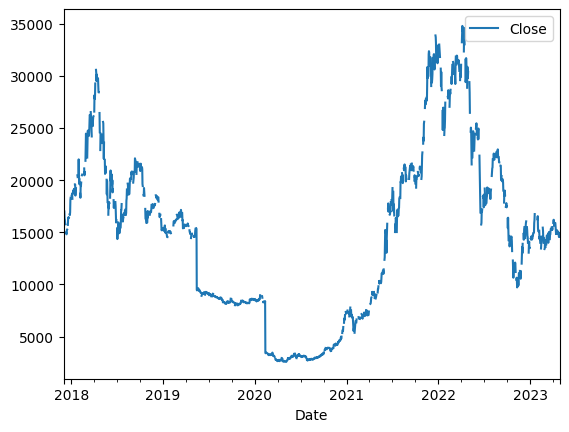

In [56]:
df.plot()

-> no trend, no season -> simple exponential smoothing

In [57]:
## Drop the removed
df = df.dropna()

In [58]:
# Split the data into train, test, and validation sets
train_size = int(len(df) * 0.7)  # 70% for training
test_size = int(len(df) * 0.2)  # 20% for testing
val_size = len(df) - train_size - test_size  # remaining 10% for validation
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:train_size+test_size]
val_data = df.iloc[train_size+test_size:]

In [35]:
train_data

,Close
Date,
2017-12-01,16511.9
2017-12-04,16997.5
2017-12-05,16303.7
2017-12-06,16234.4
2017-12-07,15818.1
...,...
2021-09-13,21507.7
2021-09-14,21110.1
2021-09-15,21269.2


In [36]:
test_data

,Close
Date,
2021-09-20,21308.9
2021-09-21,21030.6
2021-09-22,21229.4
2021-09-23,21308.9
2021-09-24,20911.3
...,...
2022-10-07,14250.0
2022-10-10,14650.0
2022-10-11,13650.0


In [37]:
val_data

,Close
Date,
2022-10-14,14500.0
2022-10-17,14500.0
2022-10-18,14600.0
2022-10-19,14550.0
2022-10-20,14150.0
...,...
2023-04-24,14950.0
2023-04-25,14600.0
2023-04-26,14650.0


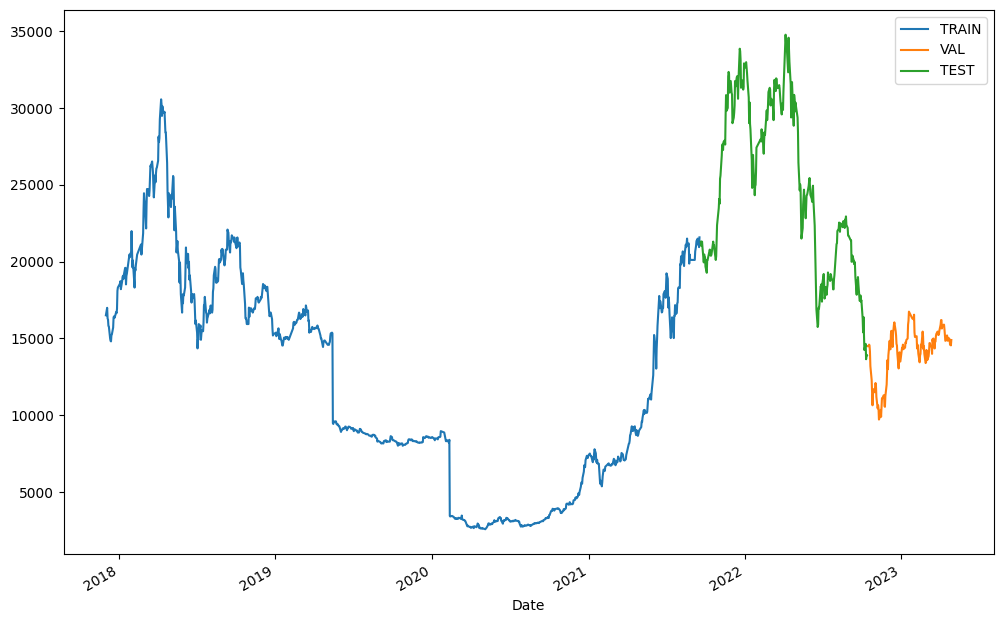

In [59]:
train_data['Close'].plot(legend=True,label='TRAIN')
val_data['Close'].plot(legend=True,label='VAL')
test_data['Close'].plot(legend=True,label='TEST',figsize=(12,8));

In [60]:
# fit exponential smoothing model to training data
ses_model = SimpleExpSmoothing(train_data).fit(smoothing_level=0.5)

y_pred = ses_model.forecast(268)

mae=mean_absolute_error(test_data, y_pred)
print(mae)

5279.44338824095


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [61]:
# make predictions on test and validation sets
test_predictions = ses_model.forecast(len(test_data))
validate_predictions =ses_model.forecast(len(val_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [62]:
# print predictions and actual values
print("Test Predictions:\n", test_predictions)
print("Test Actuals:\n", test_data)
print("Validate Predictions:\n", validate_predictions)
print("Validate Actuals:\n", val_data)

Test Predictions:
 940     21340.705756
941     21340.705756
942     21340.705756
943     21340.705756
944     21340.705756
            ...     
1203    21340.705756
1204    21340.705756
1205    21340.705756
1206    21340.705756
1207    21340.705756
Length: 268, dtype: float64
Test Actuals:
               Close
Date               
2021-09-20  21308.9
2021-09-21  21030.6
2021-09-22  21229.4
2021-09-23  21308.9
2021-09-24  20911.3
...             ...
2022-10-07  14250.0
2022-10-10  14650.0
2022-10-11  13650.0
2022-10-12  13950.0
2022-10-13  13900.0

[268 rows x 1 columns]
Validate Predictions:
 940     21340.705756
941     21340.705756
942     21340.705756
943     21340.705756
944     21340.705756
            ...     
1070    21340.705756
1071    21340.705756
1072    21340.705756
1073    21340.705756
1074    21340.705756
Length: 135, dtype: float64
Validate Actuals:
               Close
Date               
2022-10-14  14500.0
2022-10-17  14500.0
2022-10-18  14600.0
2022-10-19  14550.0
20

In [63]:
test_predictions = model.forecast(268)
test_predictions

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1343    14863.632502
1344    14863.632502
1345    14863.632502
1346    14863.632502
1347    14863.632502
            ...     
1606    14863.632502
1607    14863.632502
1608    14863.632502
1609    14863.632502
1610    14863.632502
Length: 268, dtype: float64

In [65]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(test_data['Close'],test_predictions))
print("RMSE Error is ",rms_error) 

RMSE Error is  11424.935357566457


Anh ơi em thấy đoạn này predict lạ quá, sai mà em không biết làm sai ở đâu, có gì anh coi cho em ạ

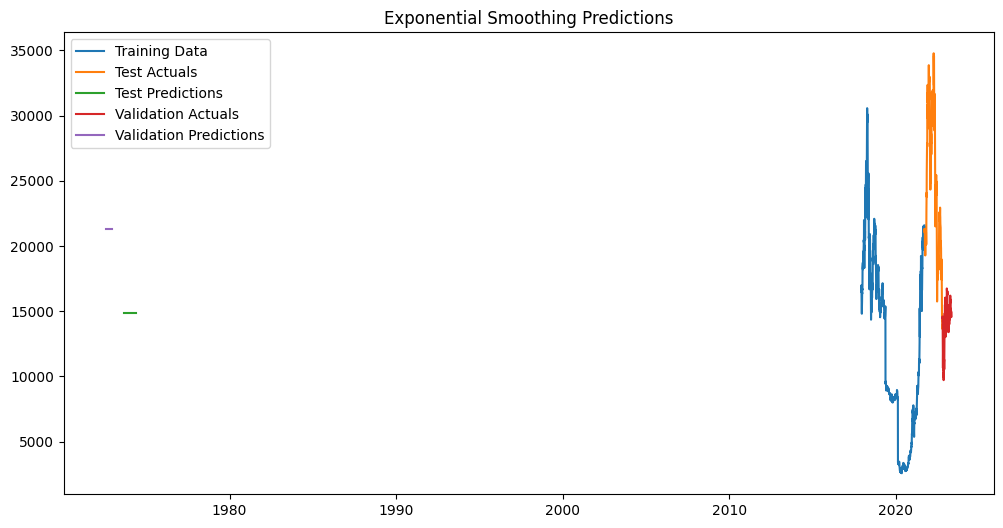

In [66]:
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Actuals')
plt.plot(test_predictions, label='Test Predictions')
plt.plot(val_data, label='Validation Actuals')
plt.plot(validate_predictions, label='Validation Predictions')
plt.legend()
plt.title('Exponential Smoothing Predictions')
plt.show()